<a href="https://colab.research.google.com/github/Jaeljane/EDA/blob/main/Multivariate_Exploration_of_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Color Palettes
Depending on the type of data you have, you may want to change the type of color palette that you use to depict your data. There are three major classes of color palette to consider:

- **Qualitative palettes** are built for nominal-type data. This is the palette class taken by the default palette.
- **Sequential** is used to depict ordinal or numeric data just fine
- **Diverging** is used in a situation where there is a meaningful zero or center value for the variable. In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center.

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('/content/pokemon.csv')
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


What is the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed?

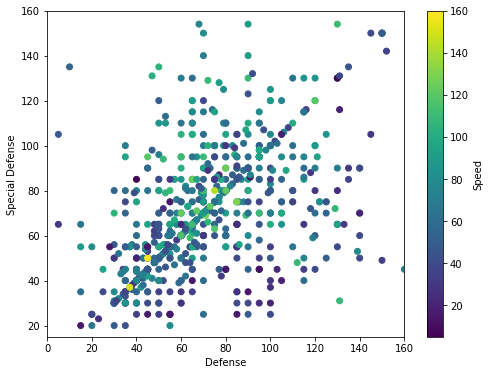

In [3]:
plt.figure(figsize = [8,6])
plt.scatter(data = df, x = 'defense', y = 'special-defense',
                  c = 'speed')
plt.colorbar(label = 'Speed')
plt.xlim(0,160)
plt.ylim(15,160)
plt.xlabel('Defense')
plt.ylabel('Special Defense');


How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon?

In [4]:
type_cols = ['type_1','type_2']
non_type_cols = df.columns.difference(type_cols)
pkmn_types = df.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


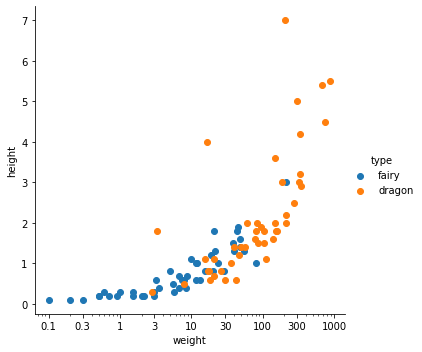

In [5]:
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]
  # plotting
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend();

Dragon pokemon generally are bigger in terms of weight and height than the fairy pokemon.

In [16]:
# g = sb.FacetGrid(data =pokemon_sub, row = 'cat_1', col = 'cat_2', size = 2.5,
#                 margin_titles = True)
# g.map(plt.scatter, 'num_1', 'num_2')

##plot matrices

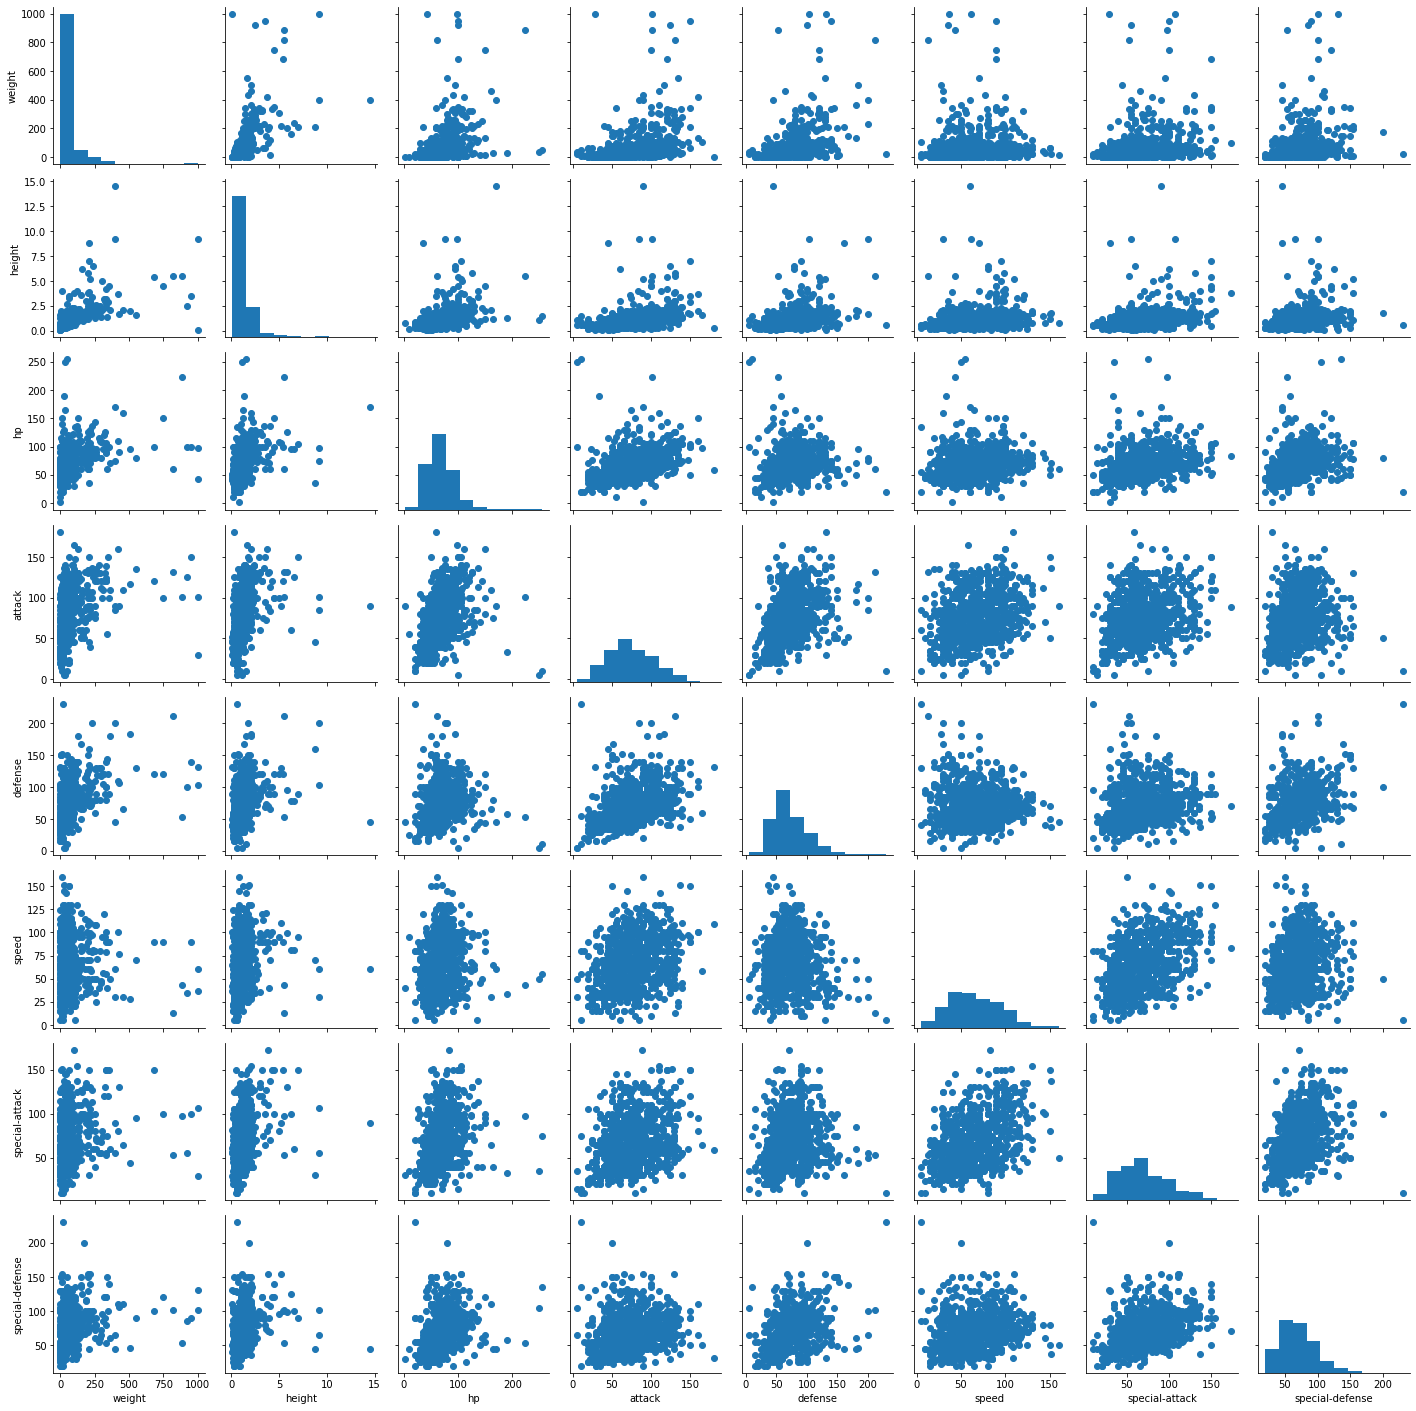

In [17]:
g = sb.PairGrid(data = df, vars = ['weight', 'height', 'hp',	'attack',	'defense',	'speed',	'special-attack',	'special-defense'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

correlation matrix

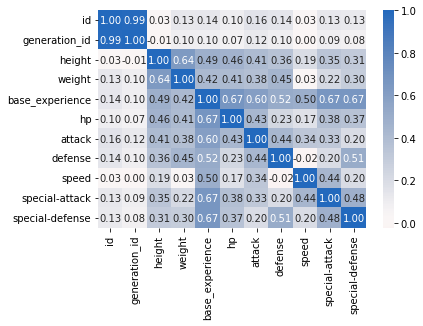

In [18]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)